<h1> Подраздел 1.4 <span class="tocSkip"></span></h1>

<h2> Задание 3. Анализ зависимостей </h2>

Необходимо найти зависимости представленные в файле .txt

## Загрузка и обработка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# создадим пустые списки для последующего построчного заполнения
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

Так как в исходном датаете есть пропуски, сдвиги, неверное разделение, то придется при чтении файла устроить некоторые танцы с бубном, так как совсем удалять некорректные строки не хочется. Их около 20 процентов. 

In [3]:
# откроем файл и считывая построчно будем заполнять выше созданные массивы
# также будем выводить некоторые косячные варианты

with open('dataset_home.txt', 'r', encoding = 'utf-8') as file:
    for line in file.readlines():
        line = line.split(',')
        if len(line) >= 7:
            
            # возраст
            try:
                age.append(int(line[0]))
            except: 
                print(f'Было {line[0]}')
                for char in line[0]:
                    if char in ['г','о','д', 'л', 'е', 'т']:
                        line[0] = line[0].replace(char,'')
                #print(f'Стало {line[0]}')
                age.append(int(line[0]))        

            # пол
            if line[1] == 'женщина':
                sex.append(0)
            elif line[1] == 'мужчина':
                sex.append(1)
             
            
            # индекс веса 
            try:
                bmi.append(float(line[2])) 
            except:
                print(line[2])

            # количество детей    
            try:
                children.append(float(line[3])) 
            except:
                print(line[3])

                
            # курит или нет    
            if line[4] == 'нет':
                smoker.append(0)
            elif line[4] == 'да':
                smoker.append(1)
            if line[5] == 'нет':
                smoker.append(0)
            elif line[5] == 'да':
                smoker.append(1)    
 
            # регион
            if line[5] == 'юго-запад':
                region.append(0)
            elif line[5] == 'северо-запад':
                region.append(1)
            elif line[5] == 'северо-восток':
                region.append(2)    
            elif line[5] == 'юго-восток':
                region.append(3)  
            if line[6] == 'юго-запад':
                region.append(0)
            elif line[6] == 'северо-запад':
                region.append(1)
            elif line[6] == 'северо-восток':
                region.append(2)    
            elif line[6] == 'юго-восток':
                        region.append(3)     
                
                
            # траты
            try:
                charges.append(float(line[6])) 
            except: 
                if line[7] != 'женщина':
                    charges.append(float(line[7])) 
                    if line[6] == 'юго-запад':
                        region.append(0)
                    elif line[6] == 'северо-запад':
                        region.append(1)
                    elif line[6] == 'северо-восток':
                        region.append(2)    
                    elif line[6] == 'юго-восток':
                        region.append(3)            

Было 21 год
Было 51 год
нет
 юго-запад
Было 56 лет
нет
 юго-восток
 да
Было 50 лет
нет
Было 60 лет


Так как мы старались, по-возможности, максимально выжать корректно заполненных данных из исходного датасета, то получившиеся списки будут разной длины. Проверим это и выведем минимальнуюю длину.

In [4]:
list = [age, sex, bmi, children, smoker, region, charges]

In [5]:
min_len = 1000
for l in list:
    l = np.array(l)
    
    print(l.shape[0])
    if min_len> l.shape[0]:
        min_len = l.shape[0]
        
print('Минимальная длина:', min_len)            

666
610
664
662
602
624
664
Минимальная длина: 602


Сделаем наши списки массивами. 

In [6]:
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

## Выявление зависимостей

### Затраты

Посмотрим распределение целевого признака - затрат. 
Напишем общую функцию для построения гистограммы

In [7]:
def hist(massiv, title):
    plt.figure(figsize = (8, 8))
    plt.hist(massiv)
    plt.title(title)
    plt.show

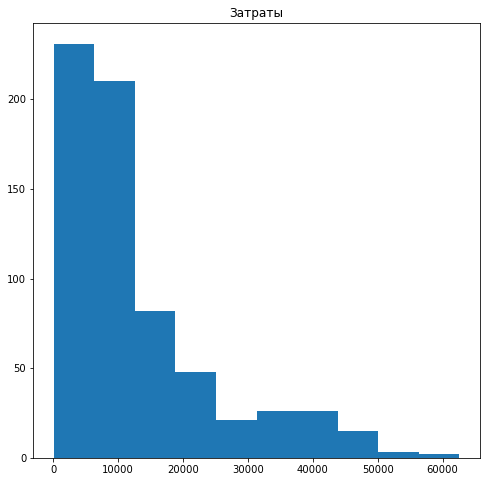

In [8]:
hist(charges, 'Затраты')

Видим,что преимущественно затраты не превышают 12000 у.е.

Посмотрим среднее значение затрат.

In [9]:
charges.mean().round(1)

12868.9

Посмотрим максимальное и минимальное значение затрат

In [10]:
charges.max(), charges.min()

(62592.87309, 30.0)

Обрежем все массивы признаков до минимальной длины.

In [11]:
age = age[:602]
sex = sex[:602]
bmi = bmi[:602]
children = children[:602]
smoker = smoker[:602]
region = region[:602]
charges = charges[:602]

### Возраст

Построим гистограмму возрастов

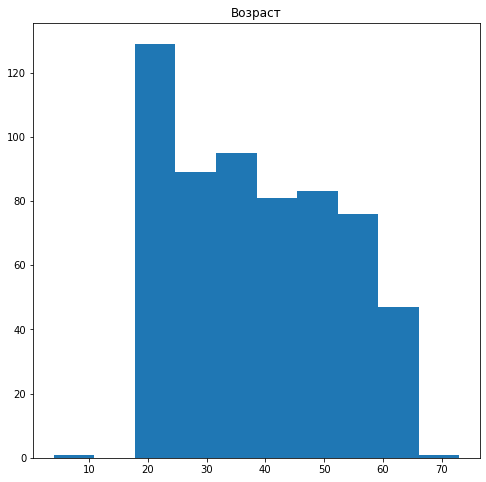

In [12]:
hist(age, 'Возраст')

Видим, что возраст в основном от 20 до 60 лет

Посомтрим, есть ли зависимсть между возрастом и затратами. 
Напищем общую функцию для построения точечной зависимсти. 

In [13]:
def scatter(mas_1, mas_2, title):
    plt.figure(figsize = (8,8))
    plt.scatter(mas_1, mas_2)
    plt.title(title)
    plt.show

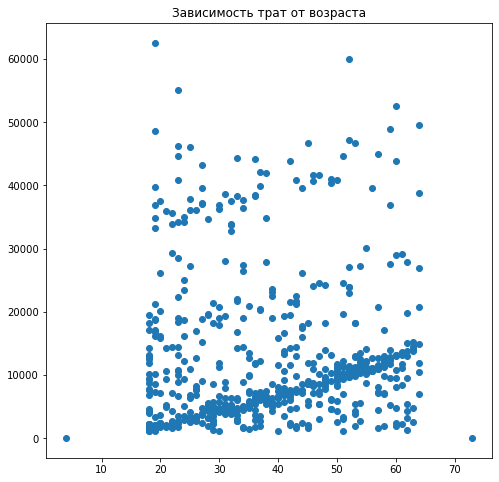

In [14]:
scatter(age, charges, 'Зависимость трат от возраста')

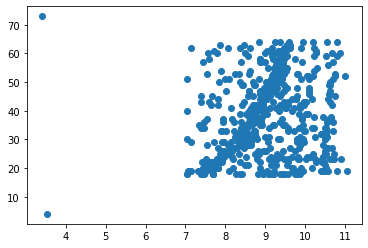

In [15]:
plt.scatter(np.log(charges), age)

Какой-то сильной корреляции не видно, хотя виден тренд на возрастание затрат с возрастом.

### Индекс массы тела

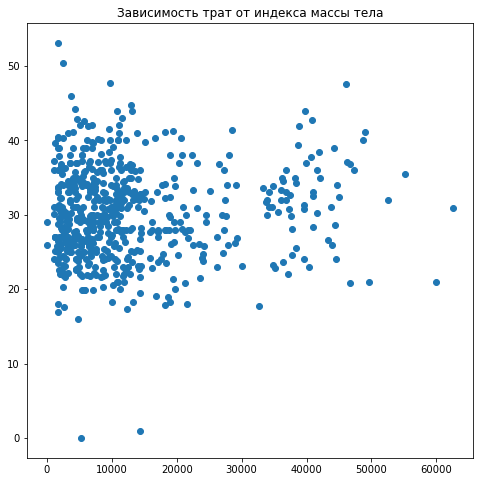

In [16]:
scatter(charges, bmi, "Зависимость трат от индекса массы тела")

Посмотрим, будет ли зависимость, если от затрат взять логарифм.

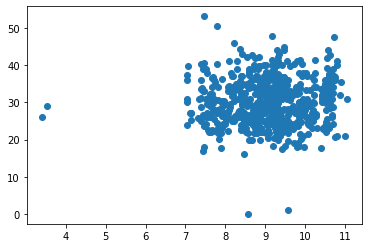

In [17]:
plt.scatter(np.log(charges), bmi)

Также не видно какой-то сильной зависимости. 
Посмотрим эту же зависимость, но в разбивке на 3 категории по возрасту. 

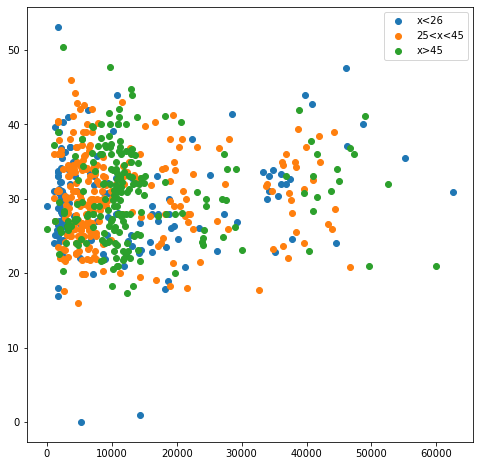

In [18]:
plt.figure(figsize = (8,8))
plt.scatter(charges[age<26], bmi[age<26], label='x<26')
plt.scatter(charges[age>25][age[age>25]<46], bmi[age>25][age[age>25]<46], label='25<x<45')
plt.scatter(charges[age>45], bmi[age>45], label='x>45')
plt.legend()
plt.show()

Да, предположение, что с возрастом независимо от индекса массы тела, затраты увеличиваются.

### Количество детей

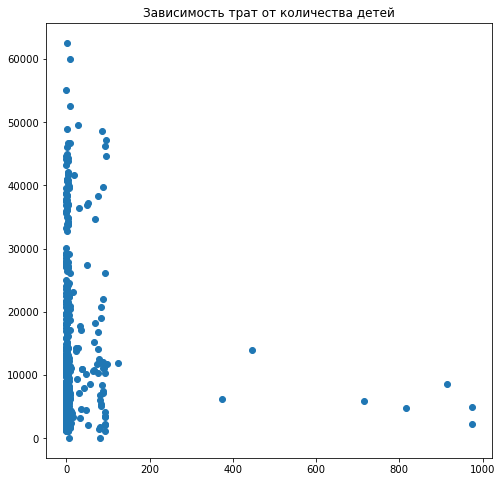

In [19]:
scatter(children, charges, 'Зависимость трат от количества детей')

Видим выбросы или неверно записанные данные, поэтоу изменим диапозон оси х. 

<function matplotlib.pyplot.show(close=None, block=None)>

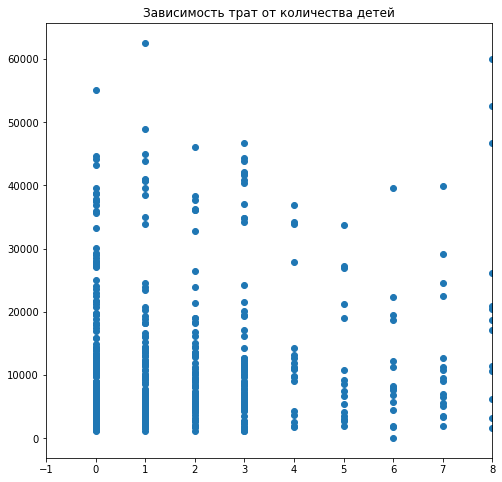

In [20]:
plt.figure(figsize = (8,8))
plt.xlim(-1, 8)
plt.scatter(children, charges)
plt.title('Зависимость трат от количества детей')
plt.show

Можно видеть, что с увеличением количества детей, затраты снижаются.

### Регион

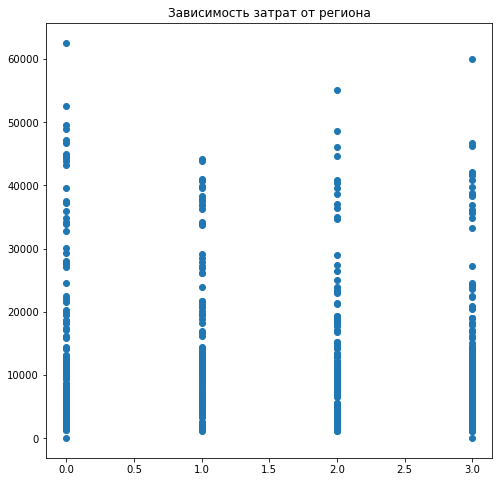

In [21]:
scatter(region, charges, 'Зависимость затрат от региона')

В целом лишь в регионе 1  (северо-запад) наблюдается чуть меньшее колмчество затрат. 

### Зависимость затрат от факта курения

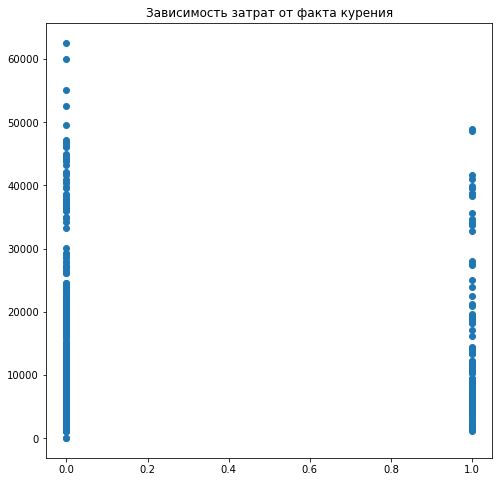

In [22]:
scatter(smoker, charges,'Зависимость затрат от факта курения')

Что ж. У курильщиков меньше затраты =)

## Вывод


В результате обработки и исследования массива данных получили, что на затраты оказывает влияние возраст. 
В меньшей степени факт курения и северо-западный регион.
Все остальные признаки не существенно оказывают влияние. 